# Importations

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

# Chargement des données

In [8]:
df = pd.read_csv("../dataset/Viral_Social_Media_Trends.csv")

In [9]:
df.head()

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


# Graphiques 

## Distribution de la variable cible

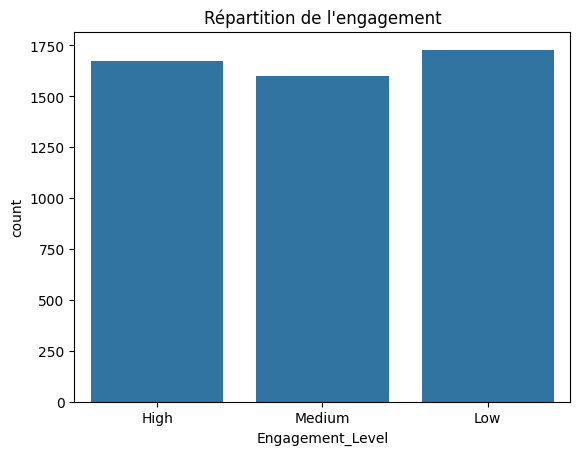

In [10]:
sns.countplot(data=df, x='Engagement_Level')
plt.title("Répartition de l'engagement")
plt.show()

Les données sont équitablement réparties, on peut donc procéder à un encodage classique. 

## Analyse des variables categorical

### Répartition des données selon plateforme, type et region

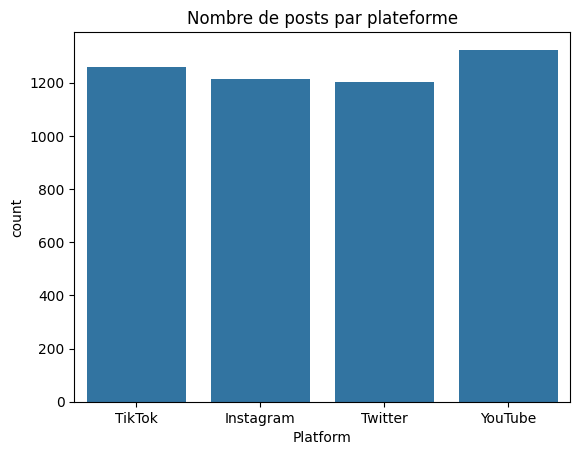

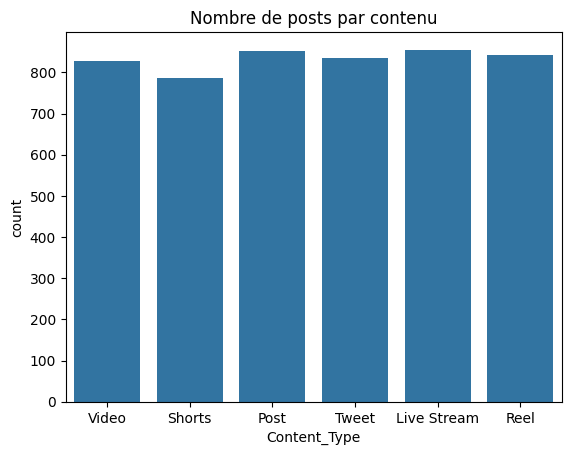

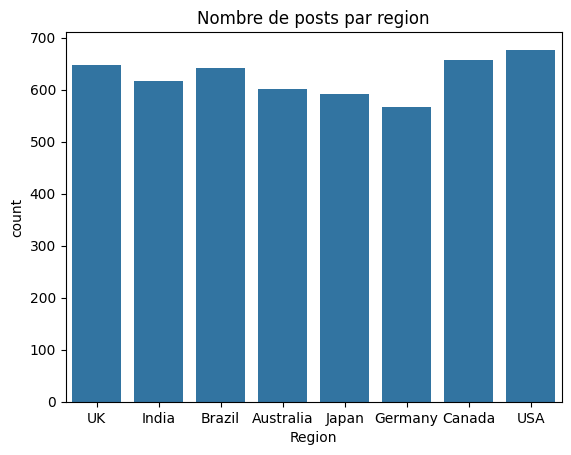

In [11]:
sns.countplot(data=df, x='Platform')
plt.title("Nombre de posts par plateforme")
plt.show()

sns.countplot(data=df, x='Content_Type')
plt.title("Nombre de posts par contenu")
plt.show()

sns.countplot(data=df, x='Region')
plt.title("Nombre de posts par region")
plt.show()

Les données sont équitablement réparties selon toutes ces catégories. On pourra donc se concentrer sur la qualité des features et des modèles, sans avoir à trop compenser des biais dans la distribution des données.

### Engagement par catégorie

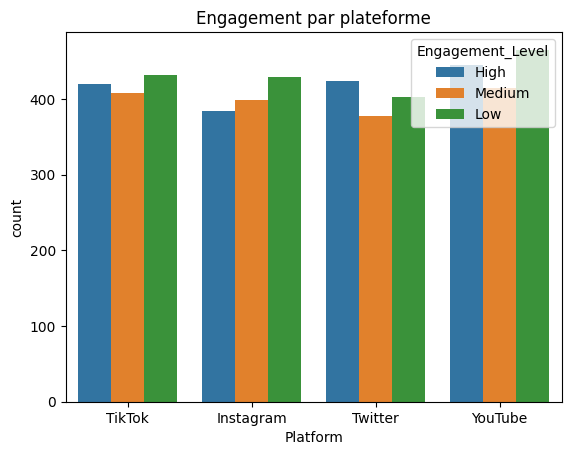

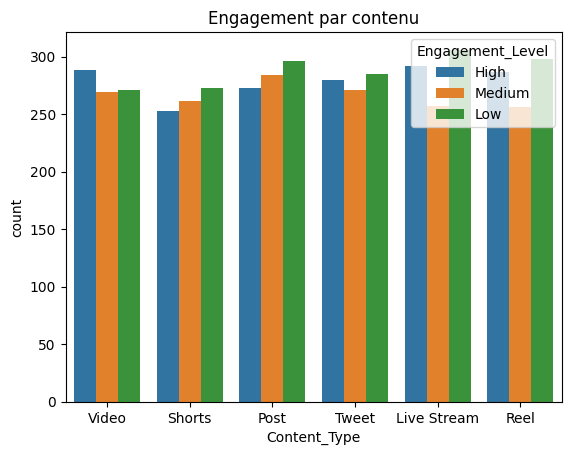

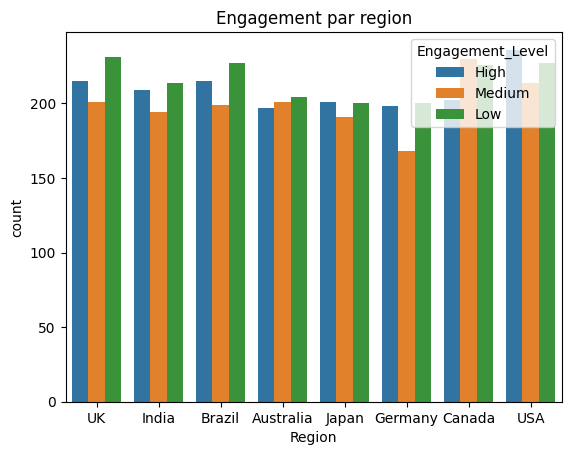

In [12]:
sns.countplot(data=df, x='Platform', hue='Engagement_Level')
plt.title("Engagement par plateforme")
plt.show()

sns.countplot(data=df, x='Content_Type', hue='Engagement_Level')
plt.title("Engagement par contenu")
plt.show()

sns.countplot(data=df, x='Region', hue='Engagement_Level')
plt.title("Engagement par region")
plt.show()

On observe que les publications sont bien réparties entre les différentes plateformes (TikTok, Instagram, Twitter, YouTube), et que les niveaux d'engagement (`Low`, `Mid`, `High`) sont également distribués sur chacune. Cela signifie que notre variable cible ne dépend pas trop fortement de la plateforme, et que notre modèle ne risque pas d’apprendre des biais liés à un sur-représentation d’une plateforme ou d’un type d'engagement spécifique.

C'est un bon signe pour la robustesse future des modèles.

## Analyse des variables numériques

### Répartition des donnée selon views, likes, shares et comments

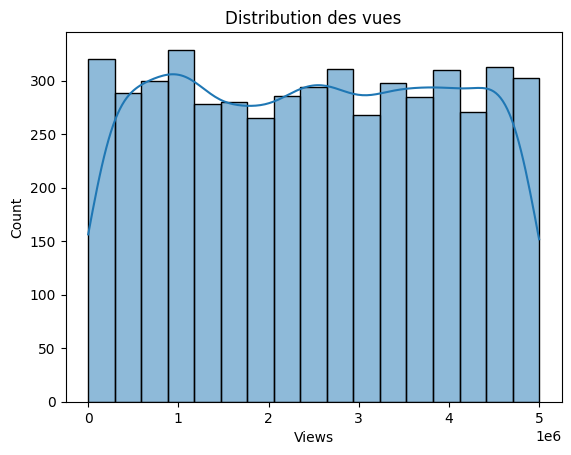

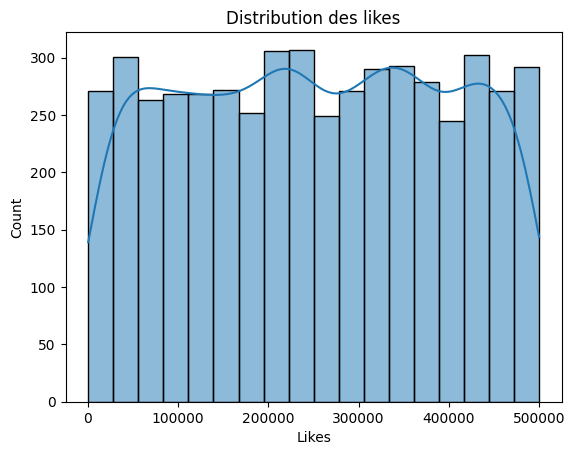

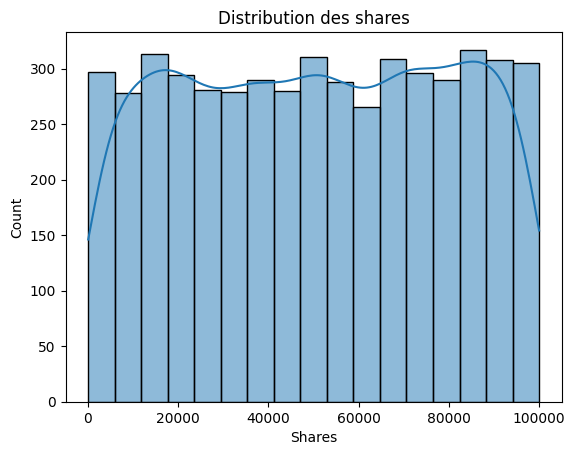

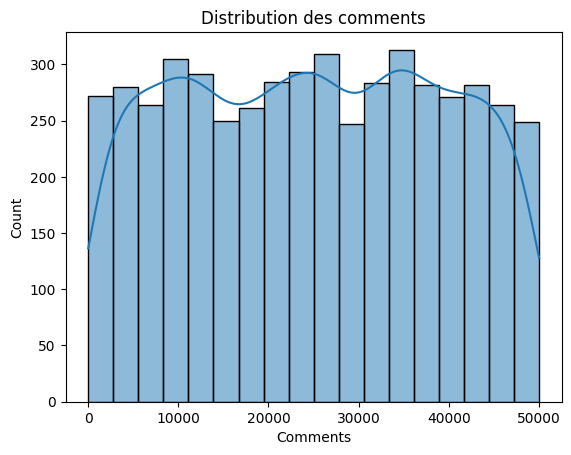

In [13]:
sns.histplot(df['Views'], kde=True)
plt.title("Distribution des vues")
plt.show()

sns.histplot(df['Likes'], kde=True)
plt.title("Distribution des likes")
plt.show()

sns.histplot(df['Shares'], kde=True)
plt.title("Distribution des shares")
plt.show()

sns.histplot(df['Comments'], kde=True)
plt.title("Distribution des comments")
plt.show()

La distribution des vues est relativement uniforme et ne présente pas de forte asymétrie. Cela suggère que les variable `Views`, `Comments`, `Shares`, et `Likes` peut être utilisée telle quelle sans transformation logarithmique, ce qui simplifie le prétraitement. Il n'y a pas non plus d'outliers flagrants à ce stade.

### variables numérique par classe cible

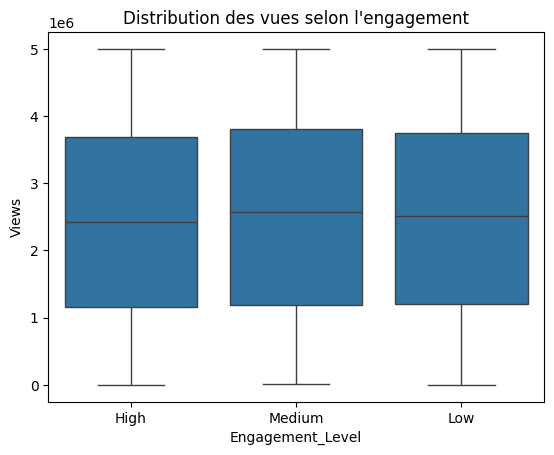

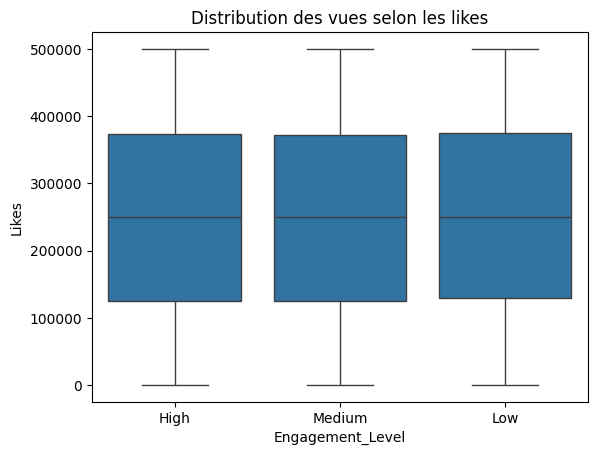

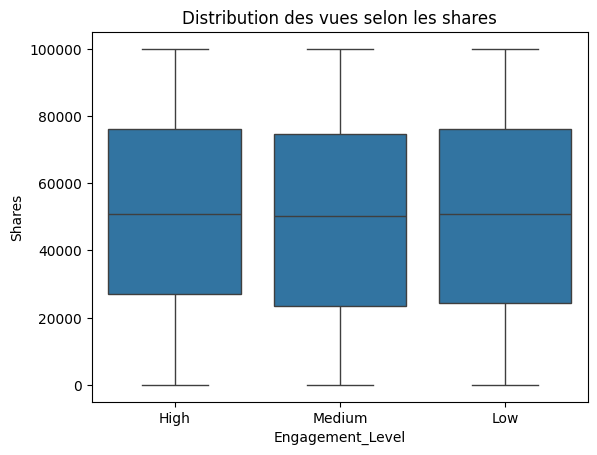

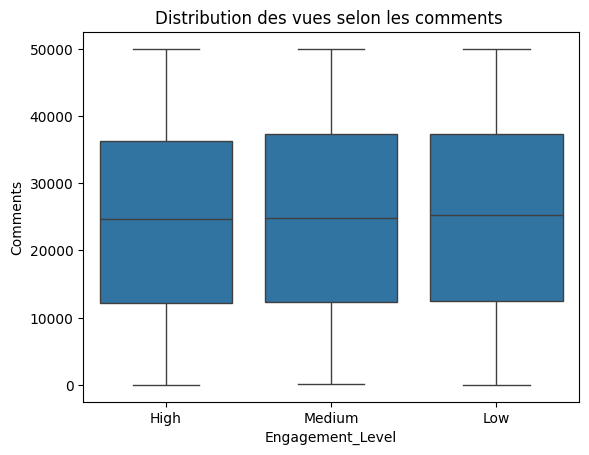

In [14]:
sns.boxplot(data=df, x='Engagement_Level', y='Views')
plt.title("Distribution des vues selon l'engagement")
plt.show()

sns.boxplot(data=df, x='Engagement_Level', y='Likes')
plt.title("Distribution des vues selon les likes")
plt.show()

sns.boxplot(data=df, x='Engagement_Level', y='Shares')
plt.title("Distribution des vues selon les shares")
plt.show()

sns.boxplot(data=df, x='Engagement_Level', y='Comments')
plt.title("Distribution des vues selon les comments ")
plt.show()

Les boxplots pour `Views`, `Likes`, `Shares` et `Comments` montrent une répartition similaire entre les niveaux `Low`, `Mid` et `High` d'engagement. Cela suggère que le niveau d'engagement n'est pas strictement lié à une seule de ces métriques. Il est probable que le label `Engagement_Level` soit basé sur une combinaison plus complexe de facteurs ou qu'il prenne en compte des dimensions non visibles dans les données actuelles. Cette faible corrélation apparente renforce l'intérêt d'explorer des approches de Machine Learning pour mieux comprendre et prédire l'engagement.


## Visualisation multivariée 

### HeatMap

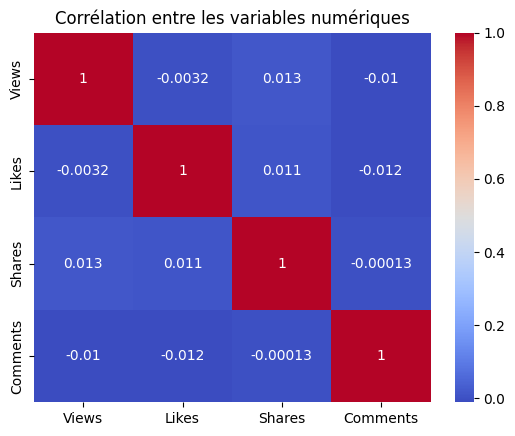

In [15]:
sns.heatmap(df[['Views', 'Likes', 'Shares', 'Comments']].corr(), annot=True, cmap='coolwarm')
plt.title("Corrélation entre les variables numériques")
plt.show()

Les données numériques ont de faibles correlations linéaires, on ne peut donc à prioris en enlever aucune.

### Pairplot

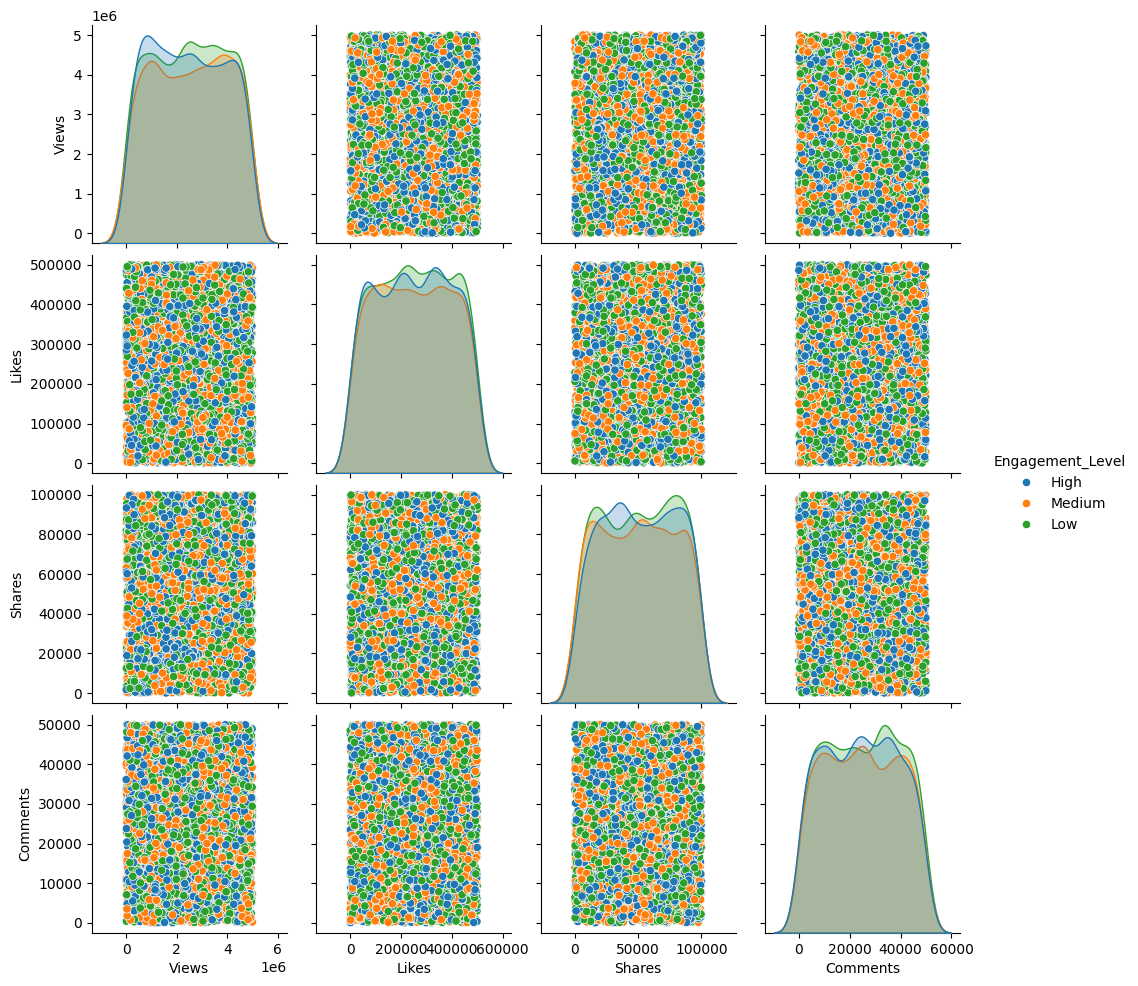

In [18]:
sns.pairplot(df, vars=['Views', 'Likes', 'Shares', 'Comments'], hue='Engagement_Level')
plt.show()



On constate ici qu'il n'y a effectivement aucune correlation visible entre les colonnes.

### ViolinPlot

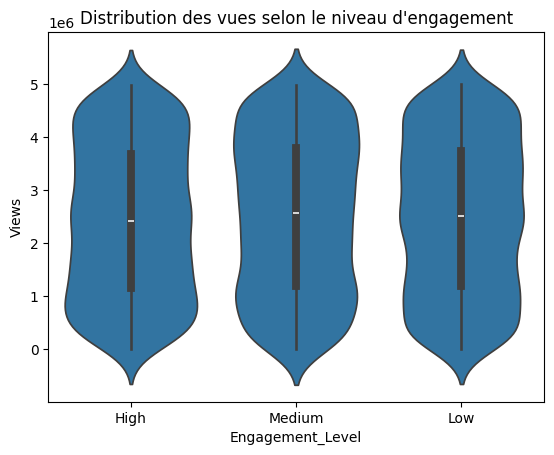

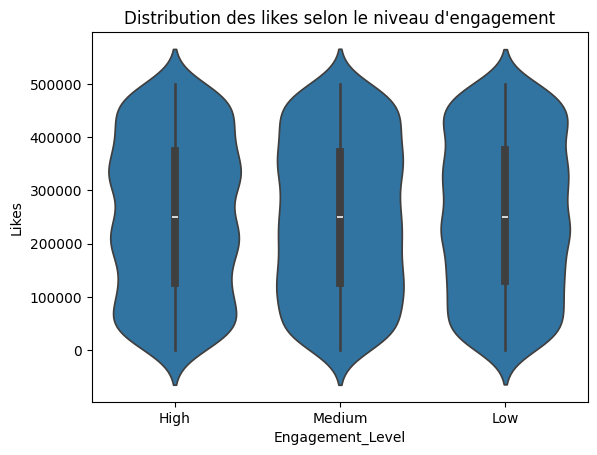

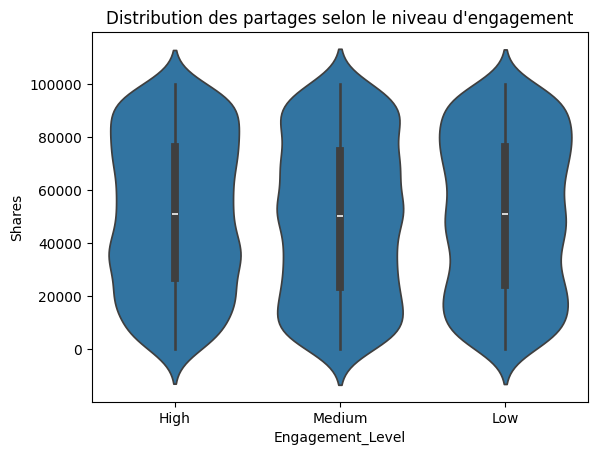

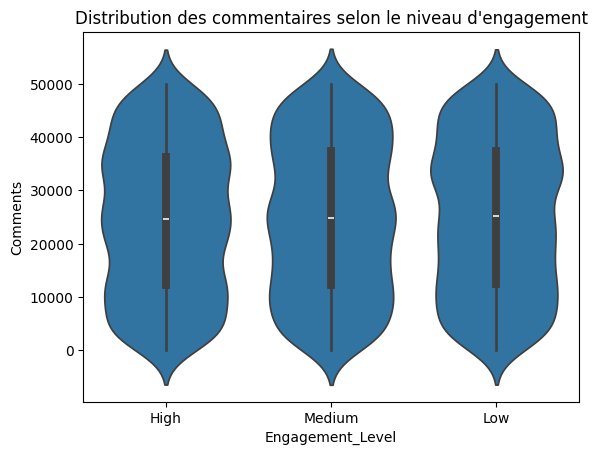

In [21]:
sns.violinplot(data=df, x="Engagement_Level", y="Views")
plt.title("Distribution des vues selon le niveau d'engagement")
plt.show()

sns.violinplot(data=df, x="Engagement_Level", y="Likes")
plt.title("Distribution des likes selon le niveau d'engagement")
plt.show()

sns.violinplot(data=df, x="Engagement_Level", y="Shares")
plt.title("Distribution des partages selon le niveau d'engagement")
plt.show()

sns.violinplot(data=df, x="Engagement_Level", y="Comments")
plt.title("Distribution des commentaires selon le niveau d'engagement")
plt.show()

Les données sont à peu près symétriques par rapport à la médiane. Il n'y a donc pas de biais fort ou d'asymétrie marquée dans la répartition des valeurs pour chaque niveau d'engagement.

## CatPlot

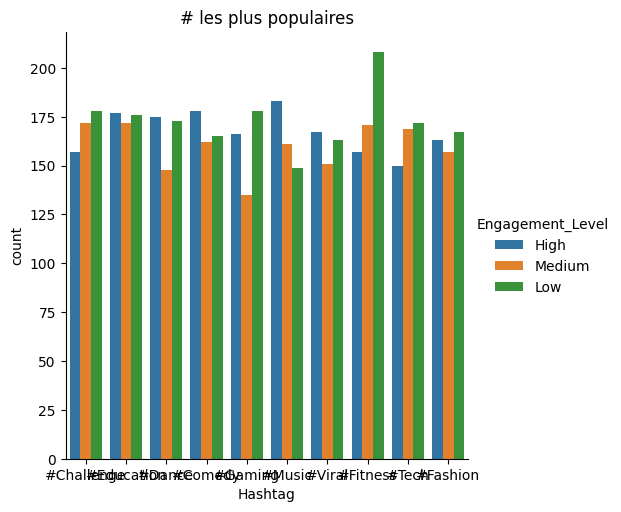

In [23]:
top_hashtags = df['Hashtag'].value_counts().nlargest(10).index
sns.catplot(data=df[df['Hashtag'].isin(top_hashtags)],
            x="Hashtag", kind="count", hue="Engagement_Level")
plt.title("# les plus populaires")
plt.show()

# Conclusion

L'analyse exploratoire des données à travers les différents graphes (pairplot, heatmap, violinplots, catplots...) met en évidence plusieurs points importants :

- **Absence de corrélation forte** entre les variables numériques (`Views`, `Likes`, `Shares`, `Comments`). La heatmap montre que les coefficients de corrélation sont très proches de zéro.
- **Répartition plutôt équilibrée** des valeurs de la variable cible `Engagement_Level` (`Low`, `Mid`, `High`) à travers les différentes variables catégorielles (`Platform`, `Region`, `Content_Type`, `Hashtag`).
- Les **violonplots** indiquent une distribution similaire des variables numériques quel que soit le niveau d’engagement, ce qui complique la séparation directe des classes.
- Les **catplots** confirment une distribution assez homogène des niveaux d’engagement pour chaque modalité des variables catégorielles.

## Conséquences pour le preprocessing

- Aucune variable numérique ne semble directement décisive pour prédire l’engagement → il sera essentiel d’**essayer différentes combinaisons de features** et **de bien normaliser ou transformer les données**.
- Les variables catégorielles peuvent avoir un **impact subtil** et devront être **encodées proprement** (One-Hot Encoding ou Label Encoding selon le modèle utilisé).
- Il pourrait être pertinent de tester plusieurs approches de **feature engineering** ou de création de variables combinées (ex. ratio `Likes/Views`, etc.).
- Cette absence de tendance claire justifie le choix d’un **modèle de machine learning supervisé**, en laissant les algorithmes identifier les patterns potentiels.

 L’approche consistera donc à tester différentes techniques de preprocessing et à les évaluer par la suite avec plusieurs modèles pour identifier celui qui généralise le mieux sur ce type de données.